Exercício retirado do site Kaggle e explorado no curso Data Sciente e Machine Learning.

# Regressão Linear - Predição da Idade

### importar bibliotecas

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [ ]:
train = pd.read_csv('D:/Trabalho/DataScience/GitHub/Portfolio/Linear_Regression_titanic_age_train.csv') #Coma Separated Values

In [ ]:
test = pd.read_csv('D:/Trabalho/DataScience/GitHub/Portfolio/Linear_Regression_titanic_age_test.csv') #Coma Separated Values

### transformar definir o Id do Passageiro como Index

In [ ]:
train.set_index('PassengerId', inplace = True)

In [ ]:
test.set_index('PassengerId', inplace = True)

### Verificar shape dos dois

In [ ]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [ ]:
test['Survived'] = np.nan
test['Survived']

PassengerId
892    NaN
893    NaN
894    NaN
895    NaN
896    NaN
        ..
1305   NaN
1306   NaN
1307   NaN
1308   NaN
1309   NaN
Name: Survived, Length: 418, dtype: float64

### Conferir shape novamente

In [ ]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [ ]:
data= pd.concat([train, test], sort = False)

In [ ]:
data.shape

(1309, 11)

### Traduzir colunas

In [ ]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConj', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']

### Traduzir Sexo

In [ ]:
data['Sexo'] = data['Sexo'].map({'male':'homen', 'female':'mulher'})

In [ ]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConj,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homen,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homen,35.0,0,0,373450,8.0500,NaN,S


### Averiguar dados nulos

In [ ]:
data.isnull().sum()

Sobreviveu     418
Classe           0
Nome             0
Sexo             0
Idade          263
IrmaosConj       0
PaisFilhos       0
Bilhete          0
Tarifa           1
Cabine        1014
Embarque         2
dtype: int64

### Remover Cabine

In [ ]:
data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [ ]:
data.isnull().sum()

Sobreviveu    418
Classe          0
Nome            0
Sexo            0
Idade         263
IrmaosConj      0
PaisFilhos      0
Bilhete         0
Tarifa          1
Embarque        2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [ ]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
moda = data['Embarque'].mode()[0]
moda

'S'

In [ ]:
data['Embarque'].fillna(moda, inplace = True)

### Checar dados nulos novamente

In [ ]:
data.isnull().sum()

Sobreviveu    418
Classe          0
Nome            0
Sexo            0
Idade         263
IrmaosConj      0
PaisFilhos      0
Bilhete         0
Tarifa          1
Embarque        0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [ ]:
media = data['Tarifa'].mean()
media

33.2954792813456

In [ ]:
data['Tarifa'].fillna(media, inplace = True)

### Checar dados nulos

In [ ]:
data.isnull().sum()

Sobreviveu    418
Classe          0
Nome            0
Sexo            0
Idade         263
IrmaosConj      0
PaisFilhos      0
Bilhete         0
Tarifa          0
Embarque        0
dtype: int64

### Verificar correlações

In [ ]:
data.corr()

,Sobreviveu,Classe,Idade,IrmaosConj,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConj,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

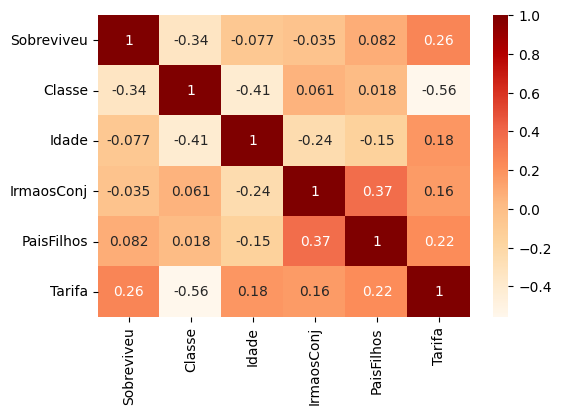

In [ ]:
f, ax = plt.subplots(dpi = 100)
sns.heatmap(data.corr(), annot = True, cmap = 'OrRd')

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [ ]:
data.drop('Sobreviveu', axis = 1 ,inplace = True)

### Checar dados nulos

In [ ]:
data.isnull().sum()

Classe          0
Nome            0
Sexo            0
Idade         263
IrmaosConj      0
PaisFilhos      0
Bilhete         0
Tarifa          0
Embarque        0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [ ]:
data['Título'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [ ]:
data['Título'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [ ]:
pd.crosstab(data['Título'], data['Sexo'])

Sexo,homen,mulher
Título,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [ ]:
['Miss', 'Master', 'Mr', 'Mrs']

['Miss', 'Master', 'Mr', 'Mrs']

In [ ]:
data['Título'] = data['Título'].apply(lambda x: 'Outros' if x not in ['Miss', 'Master', 'Mr', 'Mrs'] else x)

In [ ]:
pd.crosstab(data['Título'], data['Sexo'])

Sexo,homen,mulher
Título,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [ ]:
titulos_traduzidos = {'Master': 'Menino', 'Miss':'Senhorita', 'Mr':'Sr', 'Mrs': 'Sra'}

In [ ]:
data['Título'] = data['Título'].map(titulos_traduzidos)

In [ ]:
data['Título']

PassengerId
1              Sr
2             Sra
3       Senhorita
4             Sra
5              Sr
          ...    
1305           Sr
1306          NaN
1307           Sr
1308           Sr
1309       Menino
Name: Título, Length: 1309, dtype: object

### Averiguar informações do DataFrame

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Classe      1309 non-null   int64  
 1   Nome        1309 non-null   object 
 2   Sexo        1309 non-null   object 
 3   Idade       1046 non-null   float64
 4   IrmaosConj  1309 non-null   int64  
 5   PaisFilhos  1309 non-null   int64  
 6   Bilhete     1309 non-null   object 
 7   Tarifa      1309 non-null   float64
 8   Embarque    1309 non-null   object 
 9   Título      1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"

In [ ]:
data.drop(['Bilhete', 'Nome'], axis = 1, inplace = True)

In [ ]:
data.head()

,Classe,Sexo,Idade,IrmaosConj,PaisFilhos,Tarifa,Embarque,Título
PassengerId,,,,,,,,
1,3,homen,22.0,1,0,7.2500,S,Sr
2,1,mulher,38.0,1,0,71.2833,C,Sra
3,3,mulher,26.0,0,0,7.9250,S,Senhorita
4,1,mulher,35.0,1,0,53.1000,S,Sra
5,3,homen,35.0,0,0,8.0500,S,Sr


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [ ]:
solteiras_com_pais = data.loc[(data['Título']=='Senhorita')& (data['PaisFilhos']>=1)]

### idade média de "meninas solteiras acompanhadas dos pais"

In [ ]:
solteiras_com_pais['Idade'].mean()

12.178815789473683

### verificar distribuição da idade

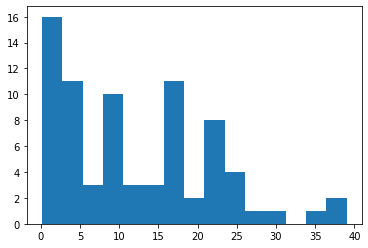

In [ ]:
plt.hist(solteiras_com_pais['Idade'], bins = 15)
plt.show()

### Média de mulheres "solteiras"

In [ ]:
data.loc[(data['Título']=='Senhorita')]['Idade'].mean()

21.774238095238097

### Distribuição das idades de mulheres "solteiras"

(array([19., 11.,  9.,  5., 10., 34., 31., 19., 13., 22.,  6., 12.,  9.,
         1.,  2.,  3.,  0.,  1.,  2.,  1.]),
 array([ 0.17  ,  3.3115,  6.453 ,  9.5945, 12.736 , 15.8775, 19.019 ,
        22.1605, 25.302 , 28.4435, 31.585 , 34.7265, 37.868 , 41.0095,
        44.151 , 47.2925, 50.434 , 53.5755, 56.717 , 59.8585, 63.    ]),
 <a list of 20 Patch objects>)

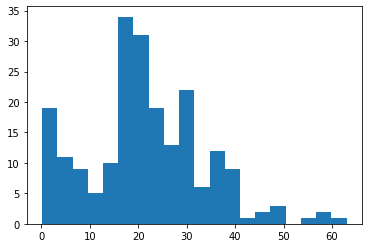

In [ ]:
plt.hist(data.loc[(data['Título']=='Senhorita')]['Idade'], bins = 20)

### Média de idade de mulheres "casadas"

In [ ]:
data.loc[(data['Título']=='Sra')]['Idade'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"

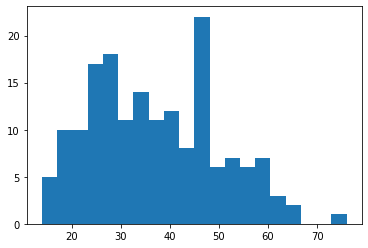

In [ ]:
plt.hist(data.loc[(data['Título']=='Sra')]['Idade'], bins=20)
plt.show()

In [ ]:
data.loc[(data['Título']=='Sra')]['Idade'].min()

14.0

### Adicionar coluna "solteira com pais"

In [ ]:
solteiras_com_pais.index

Int64Index([  11,   25,   44,   59,   69,   72,   89,  120,  129,  137,  148,
             173,  181,  185,  206,  230,  234,  238,  298,  312,  319,  330,
             342,  357,  375,  382,  410,  418,  420,  436,  437,  447,  449,
             470,  480,  486,  531,  536,  540,  541,  542,  543,  581,  586,
             594,  616,  619,  635,  643,  645,  652,  690,  692,  703,  721,
             743,  751,  793,  814,  836,  853,  854,  864,  889,  918,  944,
             945, 1009, 1017, 1032, 1067, 1078, 1080, 1095, 1106, 1130, 1142,
            1155, 1175, 1176, 1188, 1218, 1246, 1277, 1294, 1301],
           dtype='int64', name='PassengerId')

In [ ]:
data['Solteira com pais'] = 0

In [ ]:
for idx, _ in data.iterrows():
  if idx in solteiras_com_pais.index:
    data['Solteira com pais'].at[idx] = 1

In [ ]:
data.loc[(data['Solteira com pais']==1)]['Idade'].mean()

12.178815789473683

In [ ]:
data.loc[(data['Solteira com pais']==0)]['Idade'].mean()

31.26812371134021

### Transformar recursos categóricos em "dummies"

In [ ]:
data['Sexo'] = data['Sexo'].map({'homen':'homem', 'mulher':'mulher'})
data.head()

,Classe,Sexo,Idade,IrmaosConj,PaisFilhos,Tarifa,Embarque,Título,Solteira com pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,Sr,0
2,1,mulher,38.0,1,0,71.2833,C,Sra,0
3,3,mulher,26.0,0,0,7.9250,S,Senhorita,0
4,1,mulher,35.0,1,0,53.1000,S,Sra,0
5,3,homem,35.0,0,0,8.0500,S,Sr,0


In [ ]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Sexo', 'Título'], drop_first = True)

In [ ]:
data.head()

,Idade,IrmaosConj,PaisFilhos,Tarifa,Solteira com pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Sexo_mulher,Título_Senhorita,Título_Sr,Título_Sra
PassengerId,,,,,,,,,,,,,
1,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
2,38.0,1,0,71.2833,0,0,0,0,0,1,0,0,1
3,26.0,0,0,7.9250,0,0,1,0,1,1,1,0,0
4,35.0,1,0,53.1000,0,0,0,0,1,1,0,0,1
5,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [ ]:
train_idade = data.dropna()

In [ ]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [ ]:
test_idade.shape, train_idade.shape

((263, 12), (1046, 13))

## Definir X e y para treinar o modelo

In [ ]:
X = train_idade.drop('Idade', axis=1)

In [ ]:
y = train_idade['Idade']

In [ ]:
X.shape, y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [ ]:
from sklearn import linear_model

### Instanciar modelo

In [ ]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [ ]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Treinar modelo

In [ ]:
X_train.shape, y_train.shape

((732, 12), (732,))

In [ ]:
X_test.shape, y_test.shape

((314, 12), (314,))

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

### Fazer predição

In [ ]:
pred = lm.predict(X_test)
pred.shape

(314,)

### Importar mean_squared_error (erro quadrado médio)

In [ ]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [ ]:
lm.score(X_test, y_test) #R²

0.4151352562275046

### Averiguar rmse

In [ ]:
mse = mean_squared_error(y_test, pred)

In [ ]:
rmse = np.sqrt(mse)
rmse

10.997009335868976

### Visualizar resíduos em scatterplot

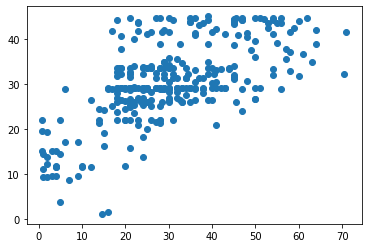

In [ ]:
plt.scatter(y_test, pred)

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

In [ ]:
test_idade.shape

(263, 12)

In [ ]:
pred_idade = lm.predict(test_idade)

In [ ]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [ ]:
test_idade['Idade'] = pred_idade

In [ ]:
test_idade.isnull().sum()

IrmaosConj           0
PaisFilhos           0
Tarifa               0
Solteira com pais    0
Classe_2             0
Classe_3             0
Embarque_Q           0
Embarque_S           0
Sexo_mulher          0
Título_Senhorita     0
Título_Sr            0
Título_Sra           0
Idade                0
dtype: int64

### Averiguar shapes

In [ ]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [ ]:
idade = pd.concat([train_idade, test_idade], sort=False)

In [ ]:
idade.shape

(1309, 13)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [ ]:
idade_completa = pd.DataFrame({'IdPassageiro':idade.index, 'Idade': idade['Idade']})

In [ ]:
idade_completa.head()

,IdPassageiro,Idade
PassengerId,,
1,1,22.0
2,2,38.0
3,3,26.0
4,4,35.0
5,5,35.0


### Salvar CSV com idade completa

In [ ]:
idade_completa.to_csv('/content/drive/MyDrive/Data Science/Curso UDEMY/Recursos/09 - Projeto - Regressao Linear - Predicao da Idade/Idade_completa.csv', index = False)

In [ ]:
data_idade = pd.read_csv('/content/drive/MyDrive/Data Science/Curso UDEMY/Recursos/09 - Projeto - Regressao Linear - Predicao da Idade/Idade_completa.csv')

In [ ]:
data_idade

,IdPassageiro,Idade
0,1,22.000000
1,2,38.000000
2,3,26.000000
3,4,35.000000
4,5,35.000000
...,...,...
1304,1300,25.317525
1305,1302,25.317092
1306,1305,28.990186
1307,1308,28.990186
